In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [7]:
data = pd.read_csv(r'G:\Air-Quality-Prediction\Data\Real-Data\Real_Combine.csv')  

In [8]:
data = data.dropna(subset=['PM 2.5'])

In [9]:
data = data.dropna()

In [10]:
data.fillna(data.median(), inplace=True)

In [8]:
print(data.head())

      T    TM   Tm     SLP     H   VV    V    VM      PM 2.5
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4  219.720833
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1  182.187500
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1  154.037500
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6  223.208333
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2  200.645833


In [9]:
print(data.columns) 

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')


In [11]:
X = data.drop('PM 2.5', axis=1)
y = data['PM 2.5']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None] 
}

In [14]:
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [15]:
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=None, min_samples_leaf=2,
                      min_samples_split=5, n_estimators=200, random_state=42)

In [16]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest Regressor": best_rf
}


In [17]:
results={}

In [18]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"R2": r2}
    print(f"{name}: R2 = {r2:.4f}")
results.pop("Tuned Random Forest Regressor", None)

Linear Regression: R2 = 0.5170
Ridge Regression: R2 = 0.5172
Lasso Regression: R2 = 0.5172
Random Forest Regressor: R2 = 0.6106


In [19]:
result_df = pd.DataFrame(results).T.sort_values(by="R2", ascending=False)
print("\nComparison of Models:")
print(result_df)


Comparison of Models:
                               R2
Random Forest Regressor  0.610568
Lasso Regression         0.517236
Ridge Regression         0.517229
Linear Regression        0.516956


In [29]:
import matplotlib.pyplot as plt

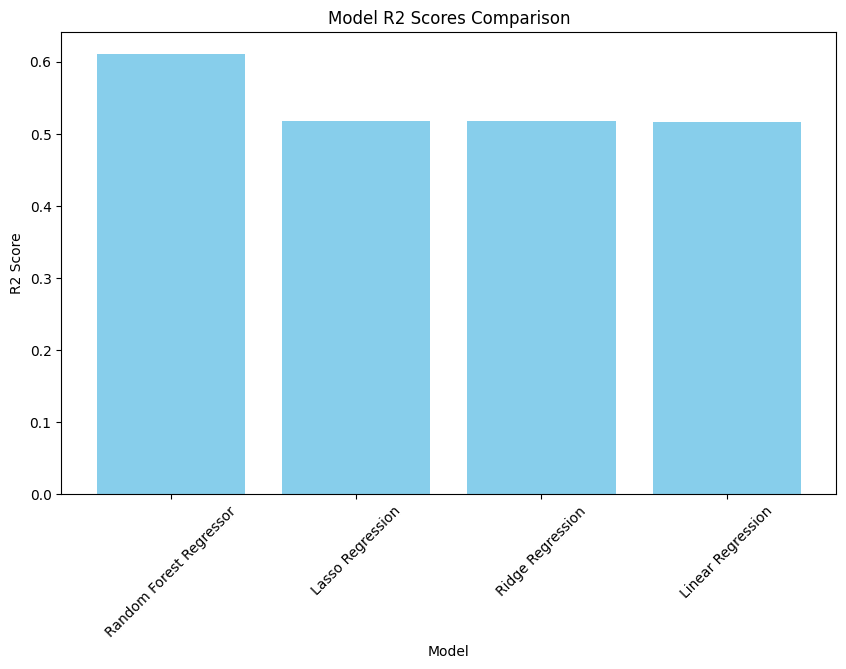

In [20]:
plt.figure(figsize=(10, 6))
plt.bar(result_df.index, result_df["R2"], color="skyblue")
plt.title("Model R2 Scores Comparison")
plt.ylabel("R2 Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()

In [22]:
print(result_df.columns)

Index(['R2'], dtype='object')


In [31]:
best_model = result_df.idxmax()['R2']
if best_model == "Random Forest Regressor":
    print("\nConclusion: Random Forest Regressor is the most efficient model for the air pollution project.")
else:
    print(f"\nFurther tuning might be needed to improve Random Forest.")


Conclusion: Random Forest Regressor is the most efficient model for the air pollution project.
